## Paths

In [130]:
import os
import image_utils as iu
import numpy as np
from PIL import Image, ImageEnhance
from xml.etree.ElementTree import parse, Element, SubElement, ElementTree
import xml.etree.ElementTree as ET


In [182]:
SETUP_PATH = 'Tensorflow'
WORKSPACE_PATH = os.path.join(SETUP_PATH, 'workspace')
SCRIPTS_PATH = os.path.join(SETUP_PATH, 'scripts')
SCRIPT_FILE = os.path.join(SCRIPTS_PATH, 'generate_tfrecord.py')
API_MODEL_PATH = os.path.join(SETUP_PATH, 'models')
ANNOTATIONS_PATH = os.path.join(WORKSPACE_PATH, 'annotations')
TRAIN_RECORD_FILE = os.path.join(ANNOTATIONS_PATH, 'train.record')
TEST_RECORD_FILE = os.path.join(ANNOTATIONS_PATH, 'test.record')
LABEL_MAP_FILE = os.path.join(ANNOTATIONS_PATH, 'label_map.pbtxt')
IMAGE_PATH = os.path.join(WORKSPACE_PATH, 'images')
TRAIN_PATH = os.path.join(IMAGE_PATH, 'train')
TEST_PATH = os.path.join(IMAGE_PATH, 'test')
MODEL_PATH = os.path.join(WORKSPACE_PATH, 'models')
PRETARINED_MODEL_PATH = os.path.join(WORKSPACE_PATH, 'pretrained-models')
CONFIG_PATH = os.path.join(MODEL_PATH, 'my_ssd_mobnet', 'pipeline.config')
CHECKPOINT_PATH = os.path.join(MODEL_PATH, 'my_ssd_mobnet')


In [3]:
#Create directories
iu.create_dir_if_not_exists(SETUP_PATH)
iu.create_dir_if_not_exists(WORKSPACE_PATH)
iu.create_dir_if_not_exists(SCRIPTS_PATH)
iu.create_dir_if_not_exists(API_MODEL_PATH)
iu.create_dir_if_not_exists(ANNOTATIONS_PATH)
iu.create_dir_if_not_exists(IMAGE_PATH)
iu.create_dir_if_not_exists(MODEL_PATH)
iu.create_dir_if_not_exists(PRETARINED_MODEL_PATH)
iu.create_dir_if_not_exists(CONFIG_PATH)
iu.create_dir_if_not_exists(CHECKPOINT_PATH)

Creating label map

In [1]:
labels = [{'name': 'Charcoal-Burns', 'id':1}]
labels

[{'name': 'Charcoal-Burns', 'id': 1}]

In [7]:
with open(os.path.join(ANNOTATIONS_PATH, 'label_map.pbtxt' ), 'w') as f:
    for label in labels:
        f.write('item{\n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## Create TF records

In [184]:

!python {SCRIPT_FILE} - x {TRAIN_PATH} - l {LABEL_MAP_FILE} - o {TRAIN_RECORD_FILE}
!python {SCRIPT_FILE} - x {TEST_PATH} - l {LABEL_MAP_FILE} - o {TEST_RECORD_FILE}


Traceback (most recent call last):
  File "Tensorflow/scripts/generate_tfrecord.py", line 29, in <module>
    from object_detection.utils import dataset_util, label_map_util
ModuleNotFoundError: No module named 'object_detection'
Traceback (most recent call last):
  File "Tensorflow/scripts/generate_tfrecord.py", line 29, in <module>
    from object_detection.utils import dataset_util, label_map_util
ModuleNotFoundError: No module named 'object_detection'


## Download TF Models Pretrained Models from TS Model Zoo

In [8]:
!cd TensorFlow && git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 78197, done.
remote: Total 78197 (delta 0), reused 0 (delta 0), pack-reused 78197
Receiving objects: 100% (78197/78197), 593.49 MiB | 341.00 KiB/s, done.
Resolving deltas: 100% (55620/55620), done.
Updating files: 100% (3199/3199), done.


In [201]:
!cp -r pycocotools TensorFlow/models/research/

cp: pycocotools: No such file or directory


In [199]:
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .


Processing /Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/Charcoal-Monitoring/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
      running bdist_wheel
      running build
      running build_py
      copying object_detection/protos/pipeline_pb2.py -> build/lib/object_detection/protos
      error: could not create 'build/lib/object_detection/protos/pipeline_pb2.py': Permission denied
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for object-detection
  Running setup.py clean for object-detection
Failed to build object-detection
  Running setup.py install for object-detection ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for object-detection did not run successfully.

In [204]:
import object_detection


ModuleNotFoundError: No module named 'object_detection'

In [186]:
if os.name == 'posix':
    !brew install install protobuf-compiler
    !cd Tensorflow/models/research & & protoc object_detection/protos/*.proto - -python_out = . & & cp object_detection/packages/tf2/setup.py . & & python - m pip install .

if os.name == 'nt':
    url = "https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} & & tar - xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + \
        os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))
    !cd Tensorflow/models/research & & protoc object_detection/protos/*.proto - -python_out = . & & copy object_detection\\packages\\tf2\\setup.py setup.py & & python setup.py build & & python setup.py install
    !cd Tensorflow/models/research/slim & & pip install - e .


Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 5 taps (heroku/brew, homebrew/core, homebrew/cask, homebrew/services and petere/postgresql).
==> New Formulae
agg                                      licenseplist
antidote                                 linux-headers@5.15
apophenia                                llvm@14
autocorrect                              lmfit
bazarr                                   lucky-commit
bdftopcf                                 mailsy
burst                                    metview
c                                        mqttui
camlp-streams                            mxnet
cargo-crev                               mycorrhiza
cargo-zigbuild                           netcdf-cxx
cbindgen                                 netcdf-fortran
censys                                   nuraft
cloudprober                              objconv
commitlint                               opencl-icd-loader
cql-proxy                                ouc

In [196]:
VERIFICATION_SCRIPT = os.path.join(
    API_MODEL_PATH, 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}


2022-10-29 15:23:16.797674: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Traceback (most recent call last):
  File "Tensorflow/models/research/object_detection/builders/model_builder_tf2_test.py", line 24, in <module>
    from object_detection.builders import model_builder
ModuleNotFoundError: No module named 'object_detection'


In [166]:
# def read_xml(path):
#     tree = ET.parse(path)
#     root = tree.getroot()
#     folder = root.find('folder').text
#     filename = root.find('filename').text
#     width = int(root.find('size/width').text)
#     height = int(root.find('size/height').text)
#     depth = int(root.find('size/depth').text)
#     # path = root.find('path').text
#     list_with_all_boxes = []
#     for boxes in root.iter('object'):
#         class_name = boxes.find("name").text
#         # ymin, xmin, ymax, xmax = None, None, None, None
#         xmin = int(boxes.find("bndbox/xmin").text)
#         ymin = int(boxes.find("bndbox/ymin").text)
#         xmax = int(boxes.find("bndbox/xmax").text)
#         ymax = int(boxes.find("bndbox/ymax").text)
#         bbox = (xmin, ymin, xmax, ymax)
#         list_with_all_boxes.append((class_name,bbox))
#     return folder, filename,(width,height, depth), list_with_all_boxes


In [177]:
# def indent(elem, level=0):
#     i = "\n" + level*"  "
#     if len(elem):
#         if not elem.text or not elem.text.strip():
#             elem.text = i + "  "
#         if not elem.tail or not elem.tail.strip():
#             elem.tail = i
#         for elem in elem:
#             indent(elem, level+1)
#         if not elem.tail or not elem.tail.strip():
#             elem.tail = i
#     else:
#         if level and (not elem.tail or not elem.tail.strip()):
#             elem.tail = i

In [179]:
# def write_xml(xml_path ,folder, filename, path ,image_dimen, bbox_list):
#     root = Element('annotation')
#     SubElement(root, 'folder').text = folder
#     SubElement(root, 'filename').text = filename
#     SubElement(root, 'path').text = path
#     source = SubElement(root, 'source')
#     SubElement(source, 'database').text = 'Unknown'

#     # Details from first entry
#     # e_filename, e_width, e_height, e_class_name, e_xmin, e_ymin, e_xmax, e_ymax = bbox_list[0]
#     image_width, image_height, depth = image_dimen
#     size = SubElement(root, 'size')
#     SubElement(size, 'width').text = str(image_width)
#     SubElement(size, 'height').text = str(image_height)
#     SubElement(size, 'depth').text = str(depth)

#     SubElement(root, 'segmented').text = '0'

#     for bbox_info in bbox_list:
#         # e_filename, e_width, e_height, e_class_name, e_xmin, e_ymin, e_xmax, e_ymax = entry
#         class_name, bbox = bbox_info
#         xmin, ymin, xmax, ymax = bbox 
#         obj = SubElement(root, 'object')
#         SubElement(obj, 'name').text = class_name
#         SubElement(obj, 'pose').text = 'Unspecified'
#         SubElement(obj, 'truncated').text = '0'
#         SubElement(obj, 'difficult').text = '0'

#         bbox = SubElement(obj, 'bndbox')
#         SubElement(bbox, 'xmin').text = str(xmin)
#         SubElement(bbox, 'ymin').text = str(ymin)
#         SubElement(bbox, 'xmax').text = str(xmax)
#         SubElement(bbox, 'ymax').text = str(ymax)

#     indent(root)
#     tree = ElementTree(root)
#     tree.write(xml_path)


In [117]:
# def get_rect(bbox):
#     xmin, ymin, xmax, ymax = bbox
#     width = xmax - xmin
#     height = ymax - ymin
#     return (xmin, ymin, width, height)


In [168]:
folder, filename, image_dimen, bbox_info = read_xml(
    'data/object-detection/project-1-at-2022-10-24-14-42-33582a8f/Annotations/399ea730-106.xml')
# boxes


('images',
 '399ea730-106.jpg',
 (320, 320, 3),
 [('Charcoal-Burns', (67, 251, 85, 269)),
  ('Charcoal-Burns', (151, 151, 172, 173)),
  ('Charcoal-Burns', (243, 209, 262, 231)),
  ('Charcoal-Burns', (37, 142, 50, 155)),
  ('Charcoal-Burns', (121, 112, 138, 133)),
  ('Charcoal-Burns', (66, 39, 87, 68))])

In [180]:
write_xml('test.xml',folder, filename, '/images', image_dimen, bbox_info)

In [51]:
# def plot_rect(image, rects, box_color, thickness= 1):
#     np_image = np.asarray(image)
#     for rect in rects:
#         x, y, w, h = rect
#         r, g, b = box_color
#         # get the row to mark.
#         #draws top line
#         np_image[y: y + thickness, x:x + w] = [r, g, b]
#         #draws left line
#         np_image[y: y + h, x: x + thickness] = [r, g, b]
#         #draws right line
#         np_image[y: y + h + thickness, x + w: x + w + thickness] = [r, g, b]
#         #draws bottom line
#         np_image[y + h: y + h + thickness, x:x + w] = [r, g, b]
#     return Image.fromarray(np_image)


In [127]:
# def rotate_labeled_image(image, angle, rects):
#     im_w, im_h = image.size
#     image = image.rotate(360 - angle)
#     new_bboxes = []
#     for rect in rects:
#         x, y, w, h = rect
#         if angle == 90:
#             bb_x = im_h - (y + h)
#             bb_y = x
#             bb_w = h
#             bb_h = w
#             new_bbox = (bb_x, bb_y, bb_w, bb_h)
#             new_bboxes.append(new_bbox)
#         elif angle == 180:
#             bb_x = im_w - (x + w)
#             bb_y = im_h - (y + h)
#             bb_w = w
#             bb_h = h
#             new_bbox = (bb_x, bb_y, bb_w, bb_h)
#             new_bboxes.append(new_bbox)
#         elif angle == 270:
#             bb_x = y
#             bb_y = im_w - (x + w)
#             bb_w = h
#             bb_h = w
#             new_bbox = (bb_x, bb_y, bb_w, bb_h)
#             new_bboxes.append(new_bbox)
#     return image, new_bboxes


In [94]:
rects = [(67, 251, 18, 18), (151, 151, 21, 22),(243, 209, 19, 22),(37, 142)]


In [160]:
# import pathlib
# def get_all_files(path, pattern = '*', get_full_path=False):
#     files = list(pathlib.Path(path).glob(pattern))
#     if get_full_path:
#         onlyfiles = [os.path.join(path,f.name) for f in files if f.is_file()]
#     else:
#         onlyfiles = [f.name for f in files if f.is_file()]
#     return onlyfiles
    # return files


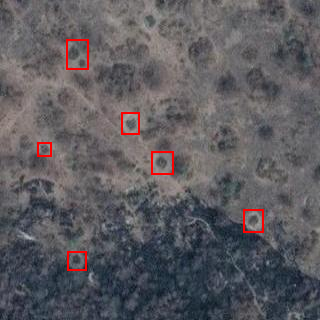

In [119]:
image_filename, bboxes = read_xml(
    'data/object-detection/project-1-at-2022-10-24-14-42-33582a8f/Annotations/399ea730-106.xml')
im = iu.read_image(
    os.path.join('data/object-detection/project-1-at-2022-10-24-14-42-33582a8f/images',image_filename), 'RGB')
rects = []
for bbox in bboxes:
    rects.append(get_rect(bbox))
plot_rect(im, rects, (255, 0, 0), 2)


In [128]:
r_im, rect = rotate_labeled_image(im, 270, rects)


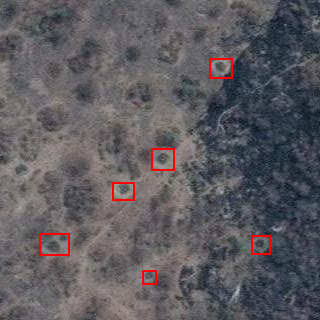

In [129]:
plot_rect(r_im, rect, (255, 0, 0), 2)

In [48]:
[(176, 205, 40, 40), (146, 103, 41, 43)][0]


(176, 205, 40, 40)

In [53]:
im.size

(374, 312)

In [23]:
np_image = np.asarray(im)
np_image[5: 5+ 2, 0]

array([[0, 0, 5],
       [1, 1, 9]], dtype=uint8)